# DEX Data Analysis

Load and analyze DEX trading data from The Graph subgraphs.

In [ ]:
import json
import os
import sys
from pathlib import Path

# Add project root to Python path
PROJECT_ROOT = Path(__file__).parent.parent if '__file__' in dir() else Path.cwd().parent
KUATO_DEV = Path.home() / 'git' / 'kuato_dev'

for path in [PROJECT_ROOT, KUATO_DEV]:
    if str(path) not in sys.path:
        sys.path.insert(0, str(path))

import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
def load_dex_data(subgraph: str, query_type: str) -> pd.DataFrame:
    """
    Load DEX data from the data directory as a pandas DataFrame.
    
    Args:
        subgraph: The subgraph name (e.g., 'uniswap_v3_ethereum', 'pancakeswap_v3_bsc')
        query_type: The query type ('pools', 'swaps', or 'tokens')
        
    Returns:
        pandas DataFrame with the query results
        
    Example:
        df = load_dex_data('uniswap_v3_ethereum', 'swaps')
    """
    data_path = PROJECT_ROOT / 'data' / subgraph / query_type / 'data.json'
    
    if not data_path.exists():
        raise FileNotFoundError(
            f"Data file not found: {data_path}\n"
            f"Run: python thegraph_dex_downloader.py --subgraph {subgraph} --query-type {query_type}"
        )
    
    with open(data_path, 'r') as f:
        data = json.load(f)
    
    df = pd.DataFrame(data)
    
    # Convert timestamp columns to datetime if present
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])
    
    return df

In [ ]:
def list_available_data() -> dict:
    """
    List all available downloaded data.
    
    Returns:
        Dictionary mapping subgraph names to lists of available query types
    """
    data_dir = PROJECT_ROOT / 'data'
    available = {}
    
    if not data_dir.exists():
        print("No data directory found. Run thegraph_dex_downloader.py first.")
        return available
    
    for subgraph_dir in data_dir.iterdir():
        if subgraph_dir.is_dir():
            query_types = []
            for query_dir in subgraph_dir.iterdir():
                if query_dir.is_dir() and (query_dir / 'data.json').exists():
                    query_types.append(query_dir.name)
            if query_types:
                available[subgraph_dir.name] = query_types
    
    return available

# Show available data
available = list_available_data()
if available:
    print("Available data:")
    for subgraph, query_types in available.items():
        print(f"  {subgraph}: {', '.join(query_types)}")
else:
    print("No data available yet. Run the downloader script first.")

## Usage Example

Load data by specifying the subgraph and query type:

In [71]:
# Example: Load data (uncomment and modify as needed)
df = load_dex_data('uniswap_v3_ethereum', 'swaps')
df.head()

,id,tx_hash,block_number,timestamp,datetime,pool_id,pair,amount0,amount1,amount_usd,sender,recipient
0,0xe9b0db62436a889471394bb46b4a3307cc9b12828a1b...,0xe9b0db62436a889471394bb46b4a3307cc9b12828a1b...,23920030,2025-12-01 17:09:59,2025-12-01 11:09:59,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,USDC/WETH,-10.500000,0.003840,10.506103,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad
1,0x97ddb84f4acbb0433f8cd7e30c1cacff7dca7503d7c0...,0x97ddb84f4acbb0433f8cd7e30c1cacff7dca7503d7c0...,23920030,2025-12-01 17:09:59,2025-12-01 11:09:59,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,USDC/WETH,-17461.007876,6.383507,17468.001328,0xa836912dce3b96cb9f3f1bf2406d6491ed601f66,0xa836912dce3b96cb9f3f1bf2406d6491ed601f66
2,0x02d52d8caef222aa9da34fefa3416f11b9b366240474...,0x02d52d8caef222aa9da34fefa3416f11b9b366240474...,23920030,2025-12-01 17:09:59,2025-12-01 11:09:59,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,USDC/WETH,176.941596,-0.064646,176.955587,0x66a9893cc07d91d95644aedd05d03f95e1dba8af,0x66a9893cc07d91d95644aedd05d03f95e1dba8af
3,0x2a82d0f1c872584940b84f271e119f342dcfa066f910...,0x2a82d0f1c872584940b84f271e119f342dcfa066f910...,23920029,2025-12-01 17:09:47,2025-12-01 11:09:47,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,USDC/WETH,-20188.305480,7.374830,20188.534900,0xfbd4cdb413e45a52e2c8312f670e9ce67e794c37,0xfbd4cdb413e45a52e2c8312f670e9ce67e794c37
4,0x9c5203f3ee2ddff0a2bf469181cf8be95e6015f61f63...,0x9c5203f3ee2ddff0a2bf469181cf8be95e6015f61f63...,23920028,2025-12-01 17:09:35,2025-12-01 11:09:35,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,USDC/WETH,-2350.298369,0.858169,2349.777992,0x365084b05fa7d5028346bd21d842ed0601bab5b8,0x365084b05fa7d5028346bd21d842ed0601bab5b8


In [83]:
df_psp = load_dex_data('pancakeswap_v3_bsc', 'pools')
n96kqolzViXblWp8DQ_8RHMe_fk56nq2


curl -X POST https://eth-mainnet.g.alchemy.com/v2/n96kqolzViXblWp8DQ_8RHMe_fk56nq2 \
     -H "Content-Type: application/json" \
     -d '{
  "jsonrpc": "2.0",
  "method": "alchemy_getTokenMetadata",
  "params": [
    "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48"
  ],
  "id": 1
}'


0x912ce59144191c1204e64559fe8253a0e49e6548

curl -X POST https://arb-mainnet.g.alchemy.com/v2/n96kqolzViXblWp8DQ_8RHMe_fk56nq2 \
     -H "Content-Type: application/json" \
     -d '{
  "jsonrpc": "2.0",
  "method": "alchemy_getTokenMetadata",
  "params": [
    "0x912ce59144191c1204e64559fe8253a0e49e6548"
  ],
  "id": 1
}'


,id,pair,token0,token1,fee_tier,token0_price,token1_price,volume_usd,tvl_usd,tx_count
0,0x36696169c63e42cd08ce11f5deebbcebae652050,USDT/WBNB,{'address': '0x55d398326f99059ff77548524699902...,{'address': '0xbb4cdb9cbd36b01bd1cbaebf2de08d9...,0.05,2.328536e+02,4.294545e-03,2.485872e+09,3.250441e+07,714104
1,0x4f3126d5de26413abdcf6948943fb9d0847d9818,USDT/BUSD,{'address': '0x55d398326f99059ff77548524699902...,{'address': '0xe9e7cea3dedca5984780bafc599bd69...,0.01,9.998185e-01,1.000182e+00,1.301926e+09,3.210200e+07,595433
2,0x172fcd41e0913e95784454622d1c3724f546f849,USDT/WBNB,{'address': '0x55d398326f99059ff77548524699902...,{'address': '0xbb4cdb9cbd36b01bd1cbaebf2de08d9...,0.01,2.328786e+02,4.294083e-03,8.217285e+08,2.465839e+05,1841218
3,0x85faac652b707fdf6907ef726751087f9e0b6687,WBNB/BUSD,{'address': '0xbb4cdb9cbd36b01bd1cbaebf2de08d9...,{'address': '0xe9e7cea3dedca5984780bafc599bd69...,0.05,4.294027e-03,2.328816e+02,8.064811e+08,6.837299e+06,604352
4,0x92b7807bf19b7dddf89b706143896d05228f3121,USDT/USDC,{'address': '0x55d398326f99059ff77548524699902...,{'address': '0x8ac76a51cc950d9822d68b83fe1ad97...,0.01,1.000071e+00,9.999289e-01,5.294911e+08,8.137285e+06,123365
...,...,...,...,...,...,...,...,...,...,...
995,0x9bab68e710d21a2963a0eafc93ea7d150629fc6f,ETH/COS,{'address': '0x2170ed0880ac9a755fd29b2688956bd...,{'address': '0x96dd399f9c3afda1f194182f71600f1...,1.00,2.960952e-06,3.377292e+05,1.402207e+03,2.009432e+03,67
996,0x9b67e1e52b60ee468085934123d1761e6bdba065,USDT/BKD,{'address': '0x55d398326f99059ff77548524699902...,{'address': '0xbe3359ac36f06311c3adc32cb6c368f...,0.01,1.005113e+00,9.949133e-01,1.398563e+03,1.021866e+03,21
997,0x29981c1b7287a9b5b9dbb7029a1a1b1775cc72ce,USDT/ERTHA,{'address': '0x55d398326f99059ff77548524699902...,{'address': '0x62823659d09f9f9d2222058878f8943...,1.00,2.361305e-03,4.234947e+02,1.388675e+03,1.387028e+01,58
998,0x061370ab057e92302b234cccef3f3f916c242db7,NfDAO/USDT,{'address': '0x3ab7014d0e896a8e486fbf5bc590eeb...,{'address': '0x55d398326f99059ff77548524699902...,1.00,4.933769e+02,2.026848e-03,1.385933e+03,5.771926e+02,444


In [79]:
from src import feeds
instrument = "ETHUSD"
start_date = "20251130"
end_date = "20251201"
feed = feeds.PolygonAggregateFeed(symbol=instrument)
ds = feed.load_historical_dataset(
    start_date=start_date, end_date=end_date
)

In [80]:
df_poly = ds['close'].to_dataframe().reset_index()
df_poly['time'] = pd.DatetimeIndex(df_poly['timestamp']* 1000000)

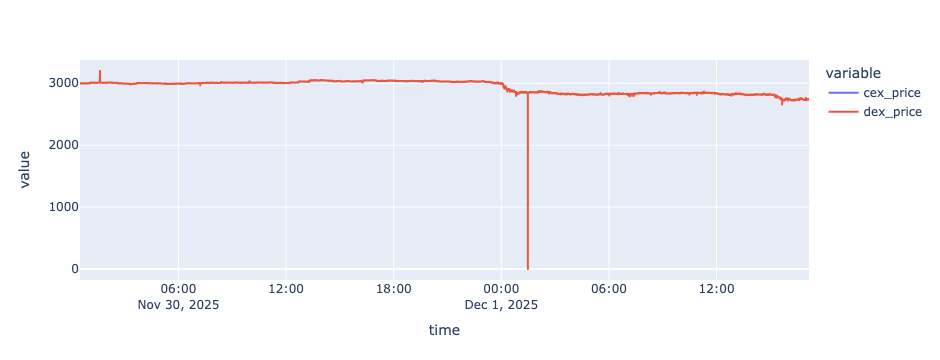

In [81]:
df_merged = pd.merge_asof(df.sort_values(by='timestamp'), df_poly, left_on='timestamp', right_on='time')
df_final = df_merged[['time', 'close', 'price']].rename(columns={"price": "dex_price", "close": "cex_price"})
px.line(df_final, 'time', ['cex_price', 'dex_price'])